# HackerEarth Machine Learning challenge:Calculate the severity of an airplane accident

The dataset consists of certain parameters recorded during the incident⁠ such as cabin temperature, turbulence experienced, number of safety complaints prior to the accident, number of days since the last inspection was conducted before the incident, an estimation of the pilot’s control given the various factors at play, and the likes. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
from IPython.core.display import HTML
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Analysis of the Dataset

In [3]:
train_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
train_df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [25]:
grouped = train_df.groupby('Severity')
print("Class size:\n", grouped.size())
print("\nClass averages:\n")
display(HTML(grouped.mean().to_html()))

Class size:
 Severity
Highly_Fatal_And_Damaging                  3049
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Significant_Damage_And_Serious_Injuries    2729
dtype: int64

Class averages:



,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,,,,,,,,,,,
Highly_Fatal_And_Damaging,33.353611,12.764513,6.337160,66.541401,0.367432,80.023526,3.467366,31940.145431,1.963267,0.302307,6307.969170
Minor_Damage_And_Injuries,47.800305,13.170162,6.827859,64.350232,0.386255,79.903961,3.269490,32225.568306,1.981797,0.311014,6292.467353
Significant_Damage_And_Fatalities,47.102113,13.071386,6.486726,60.059293,0.412759,80.041516,4.500885,31300.789137,2.175811,0.247845,6181.897345
Significant_Damage_And_Serious_Injuries,42.667443,12.808721,6.622206,67.480750,0.373382,79.924478,4.282155,32298.893626,1.993404,0.157048,6248.868816


# Exploatory Data Analysis

Correlation_Plot among the variables

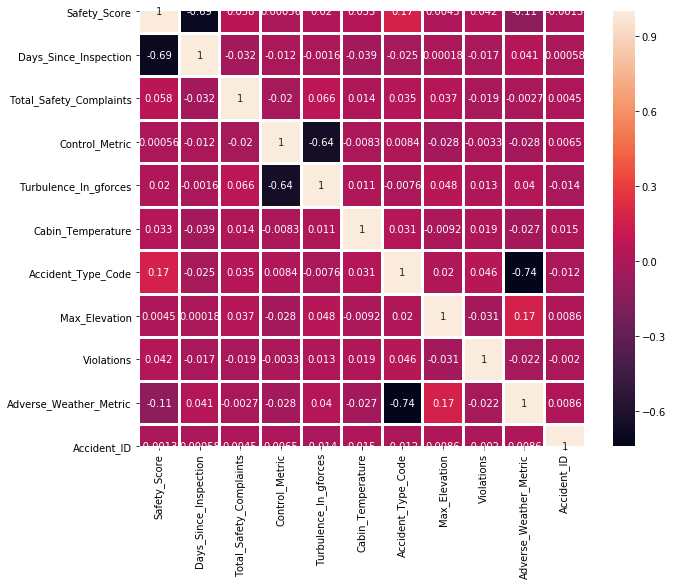

In [30]:
corr = train_df.corr()

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot = True, linewidths=2 ,ax=ax)
plt.show()

In [6]:
print(train_df['Severity'].unique())

['Minor_Damage_And_Injuries' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']


In [7]:
train_df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [8]:
train_df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

## Univariate Analysis

Severity it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.

In [9]:
train_df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

Text(0, 0.5, 'Count')

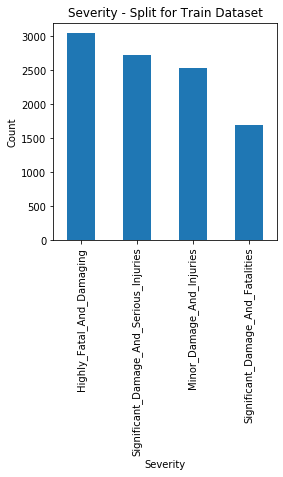

In [10]:
train_df['Severity'].value_counts().plot.bar(figsize=(4,4),title='Severity - Split for Train Dataset')
plt.xlabel('Severity')
plt.ylabel('Count')

Distribution Visualization of Numeracle Attributes

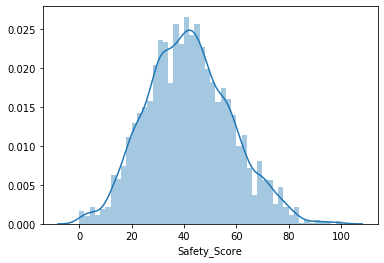

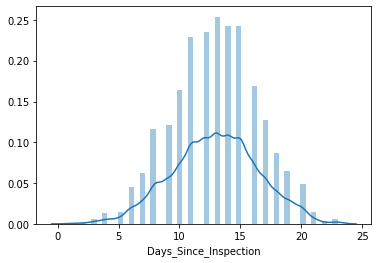

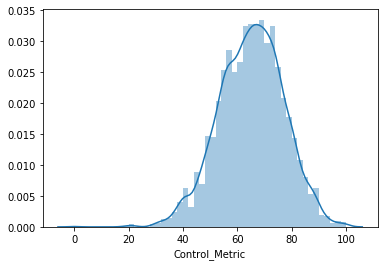

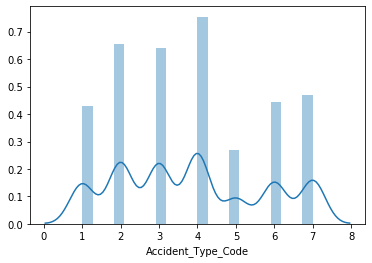

In [21]:
cols = ['Safety_Score', 'Days_Since_Inspection', 'Control_Metric', 'Accident_Type_Code']
for col in cols:    
    plt.figure(1)
    sns.distplot(train_df[col])

    plt.show()

Checking Missing Values

In [12]:
train_df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

Accident_Type_Code Vs Target Variable

Accident_Type_Code Value Distribution among 4 Severity Classses

In [13]:
pd.crosstab(train_df.Accident_Type_Code, train_df.Severity, margins=True)

Severity,Highly_Fatal_And_Damaging,Minor_Damage_And_Injuries,Significant_Damage_And_Fatalities,Significant_Damage_And_Serious_Injuries,All
Accident_Type_Code,,,,,
1,521,231,261,158,1171
2,461,1021,168,141,1791
3,315,309,95,1033,1752
4,1178,269,399,211,2057
5,168,350,80,140,738
6,210,193,93,719,1215
7,196,154,599,327,1276
All,3049,2527,1695,2729,10000


# Feature Importances Based on Extra Tree Classifier

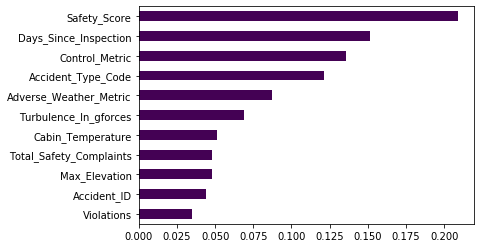

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',cmap='viridis')
plt.show()

# Selecting Most Relevant Features 

As from the above figure I have selected 4 Components for developing the model.

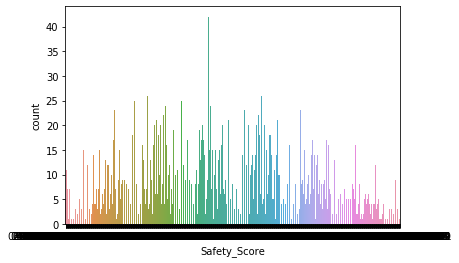

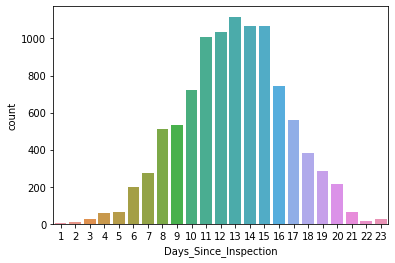

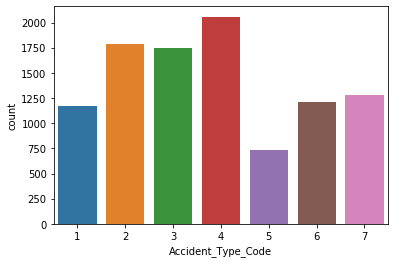

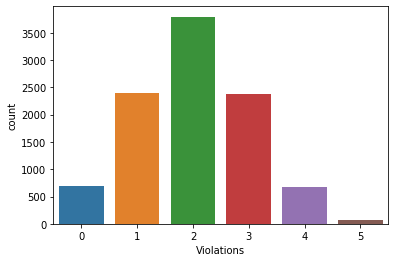

In [17]:
relevant_Features=['Safety_Score','Days_Since_Inspection','Accident_Type_Code','Violations']
for val in relevant_Features:
    sns.countplot(train_df[val])
    plt.show()

# Pair Plot of the Dataset

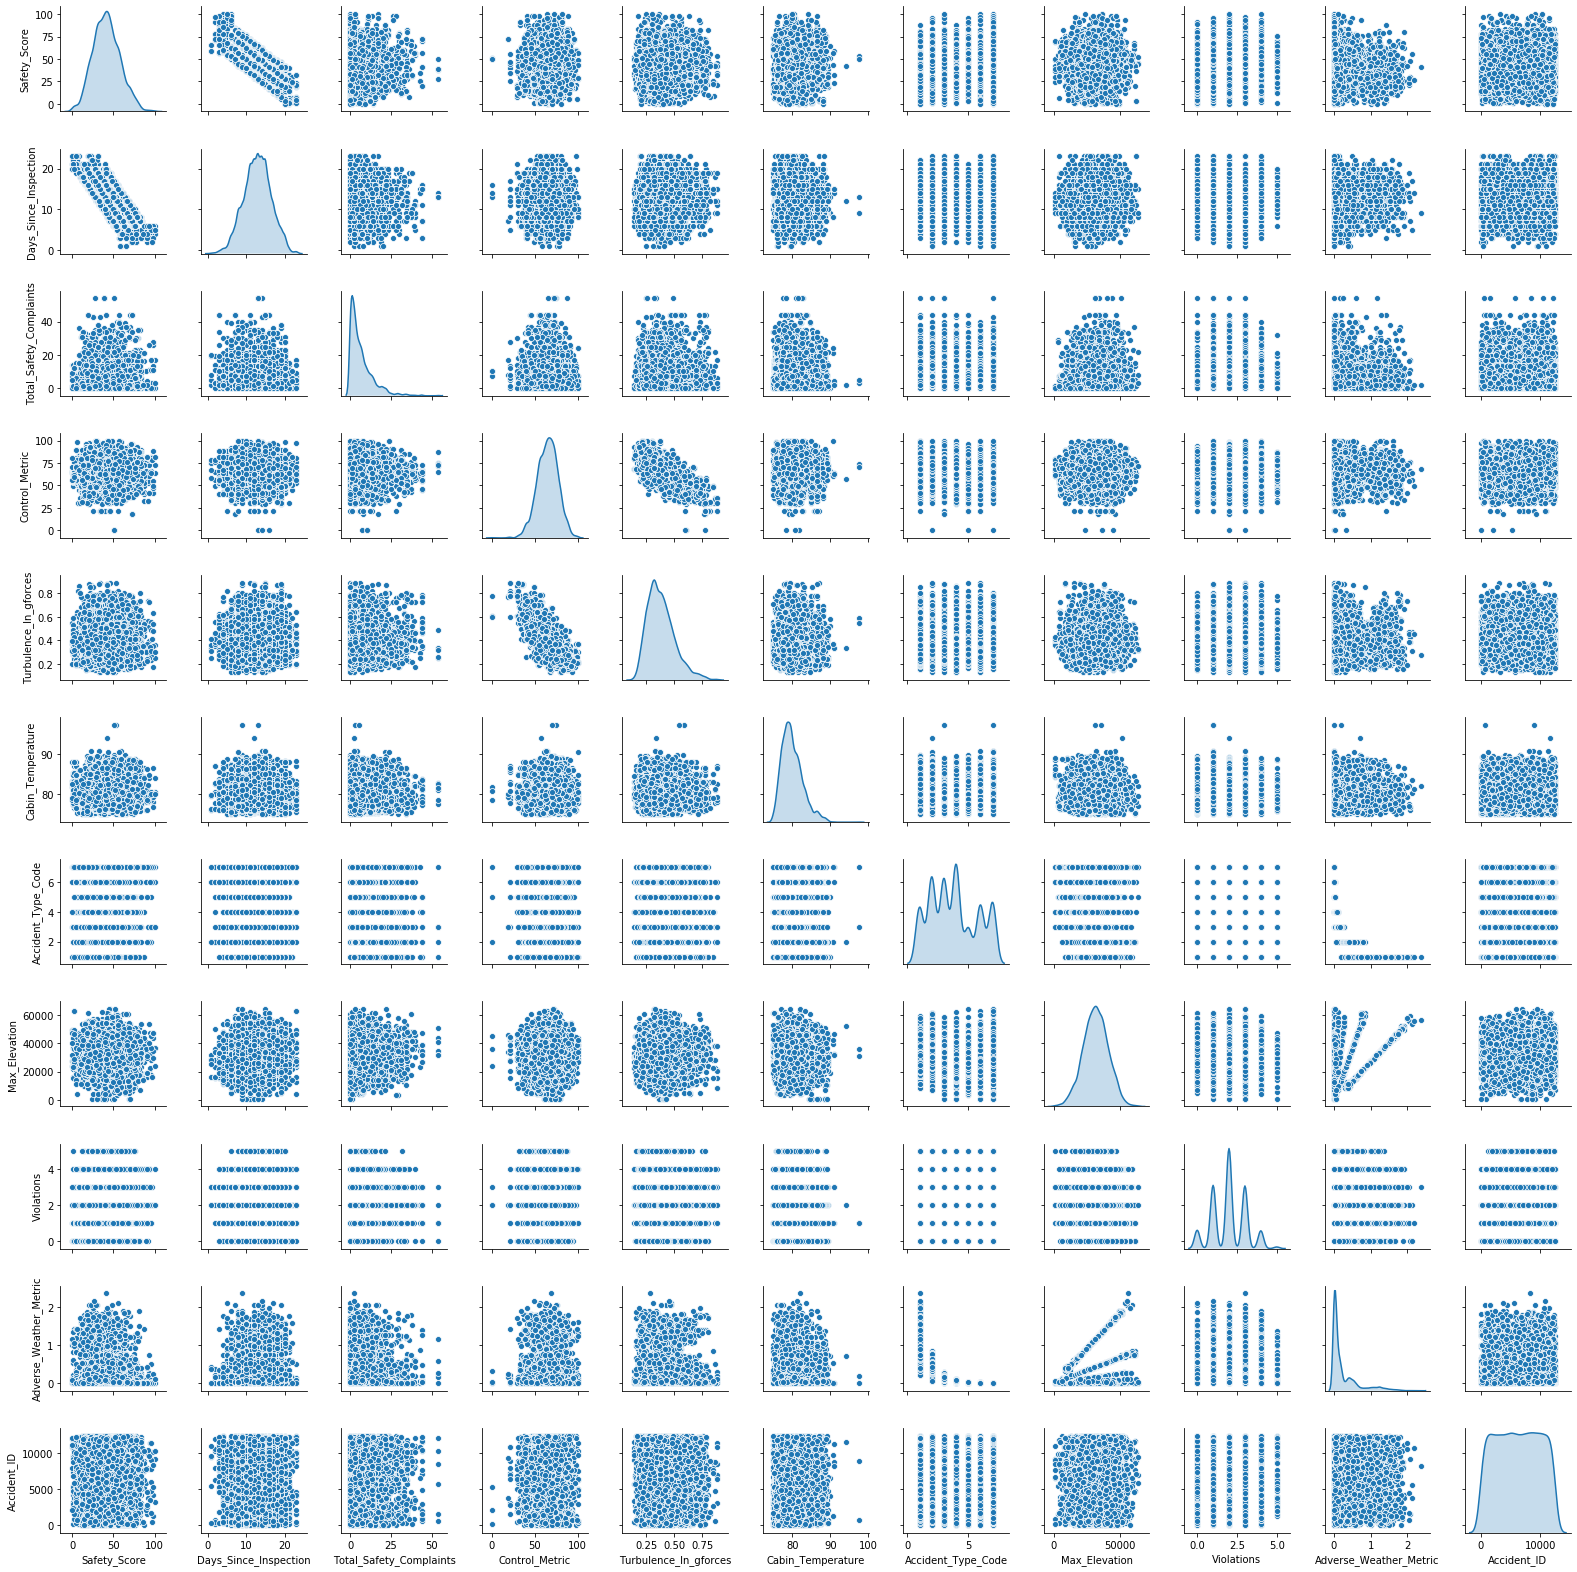

In [31]:
sns.pairplot(train_df,size = 2 ,kind ='scatter',diag_kind='kde')

## Defining the Dependent and Independent Features

In [3]:
X = train_df.drop(['Severity','Turbulence_In_gforces','Accident_ID','Adverse_Weather_Metric','Total_Safety_Complaints','Max_Elevation','Cabin_Temperature','Violations'], axis=1)
Y = train_df.iloc[:, 0:1]

# Gradient Boosting Implementation

In [4]:
dup_test = test_df

In [5]:
X = train_df.drop(['Severity','Turbulence_In_gforces','Accident_ID','Adverse_Weather_Metric','Total_Safety_Complaints','Max_Elevation','Cabin_Temperature','Violations'], axis=1)
Y = train_df.iloc[:, 0:1]

In [6]:
X.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code
0,49.223744,14,71.285324,2
1,62.465753,10,72.288058,2
2,63.059361,13,66.362808,7
3,48.082192,11,74.703737,3
4,26.484018,13,47.948952,3


In [7]:
X.shape

(10000, 4)

Label Encoding The Target Column

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y['Severity'])

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
"""Best Parameters: {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 6,
'min_samples_split': 5, 'n_estimators': 1200, 'random_stae':42}"""
param_grid = { 
     'learning_rate':[0.2,0.3,0.5],
     'max_depth':[6,7],
     'min_samples_split':[5,6],
     'random_state':[0]
    
}
CV_gb = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=10, n_jobs=-1)
CV_gb.fit(X, Y)
print (f'Best Parameters: {CV_gb.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  1.2min remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


Best Parameters: {'learning_rate': 0.25, 'max_depth': 6, 'min_samples_split': 5, 'random_state': 0}


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
classifier = GradientBoostingClassifier(n_estimators=1250,random_state=0,max_depth=6,min_samples_split=5,learning_rate=0.2)
classifier.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
GB_accuracies = cross_val_score(estimator=classifier,X=X,y=Y,cv=5,scoring='f1_weighted')
print("Mean GB Accuracies:",GB_accuracies.mean())

Mean GB Accuracies: 0.9748950226078902


In [10]:
test_df = test_df.drop(['Turbulence_In_gforces','Accident_ID','Adverse_Weather_Metric','Total_Safety_Complaints','Max_Elevation','Cabin_Temperature','Violations'], axis=1)

# Creating Submission File

In [11]:
preds1 = classifier.predict((test_df))
submission = pd.DataFrame({'Accident_ID':dup_test.Accident_ID,'Severity':preds1})
submission.to_csv('my_submission.csv',index=False)

In [12]:
submission['Severity'].value_counts()

Highly_Fatal_And_Damaging                  762
Minor_Damage_And_Injuries                  681
Significant_Damage_And_Serious_Injuries    651
Significant_Damage_And_Fatalities          406
Name: Severity, dtype: int64

In [27]:
from IPython.display import FileLink, FileLinks
FileLink('my_submission.csv')

C:\Users\KIIT\Desktop\Hackearth_Airline_Hackathon\my_submission.csv